**Titanic data**: We wanna predict who survives
- **Survived**:	Survival	0 = No, 1 = Yes
- **Pclass**:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- **Sex**: Sex	
- **Age**:	Age in years	
- **Sibsp**:	# of siblings / spouses aboard the Titanic	
- **Parch**:	# of parents / children aboard the Titanic	
- **Ticket**:	Ticket number	
- **Fare**:	Passenger fare	
- **Cabin**:	Cabin number	
- **Embarked**:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

- **Survived**: Target feature, see correlations, what influences it the most(scatter)
- **Pclass**: Group by sex, age, embarked place, see the fare for each. Does big families go more on 1st class? (rich people)
- **Sex**: 
- **Age**:
- **Sibsp**: how many go on big families ?
- **Parch**: Most people alone or not ?
- **Fare**: do men pay more? do olders pay more? discount for big families? 
- **Embarked**: how many went into titanic on C and Q? 

In [1]:
!pip install sweetviz 

In [1]:
#Import libraries
import sweetviz as sv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Validation
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold

In [2]:
#Import data
train= pd.read_csv('https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv')

In [3]:
#Look data
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


                                             |                                             | [  0%]   00:00 ->…


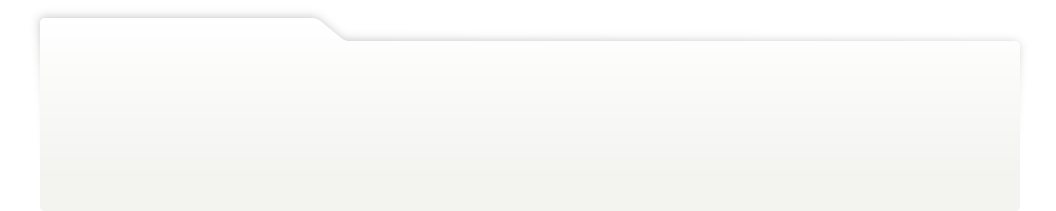
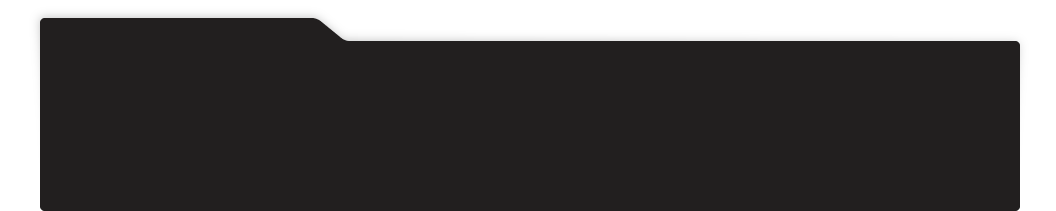
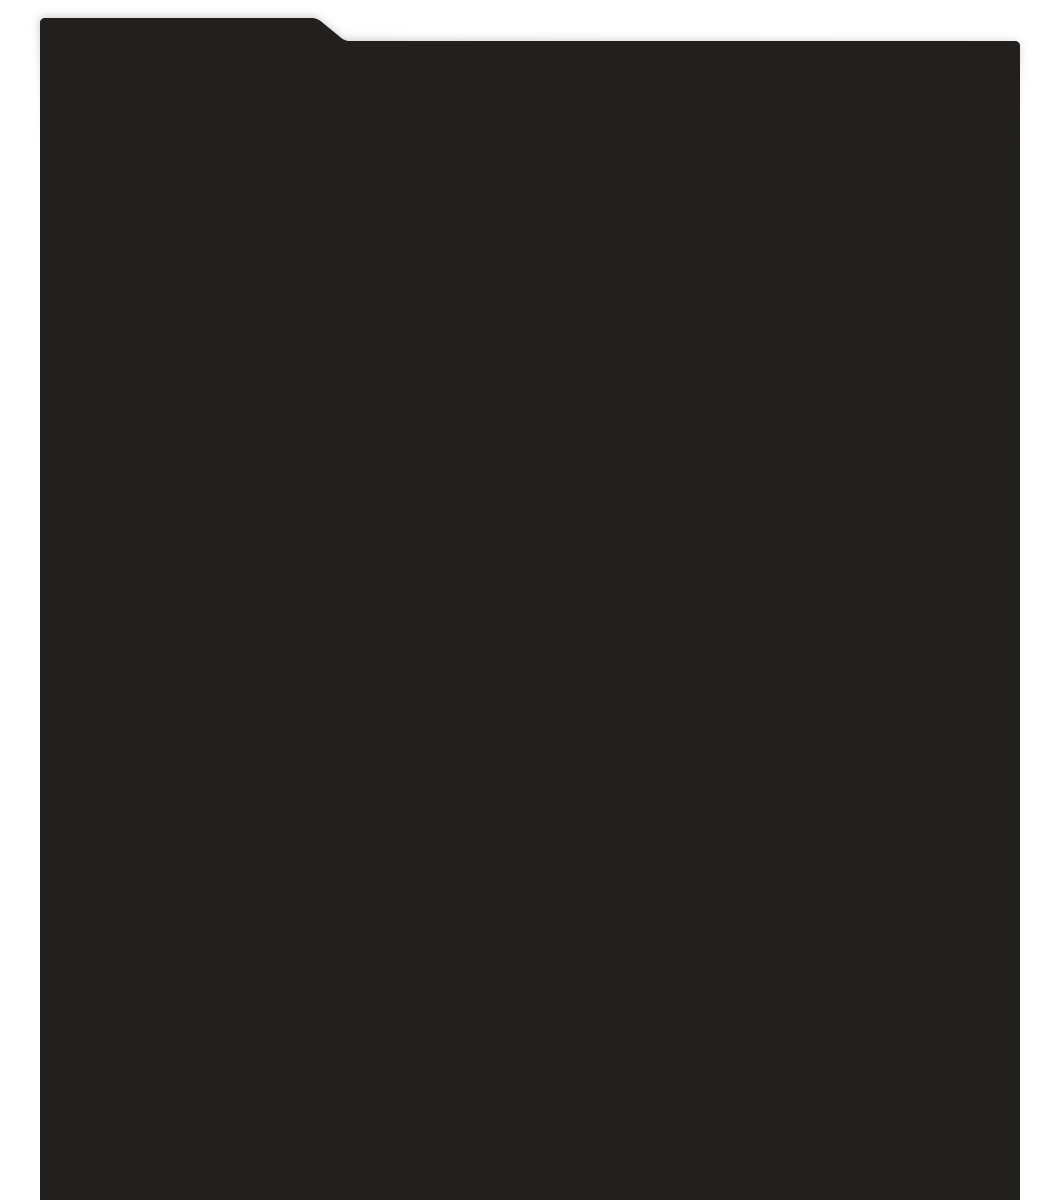
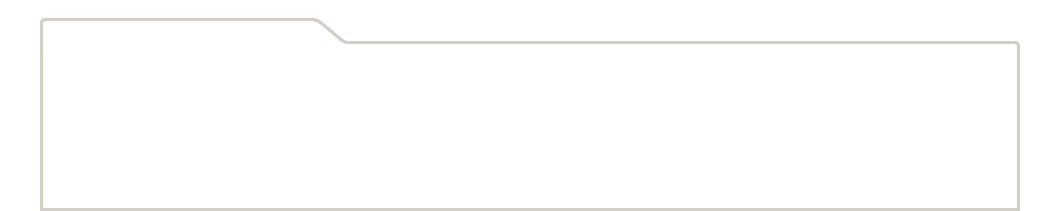
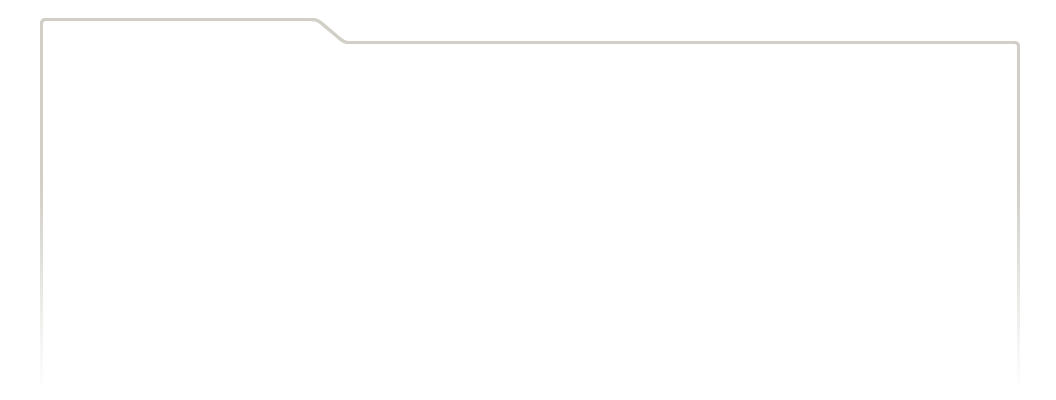
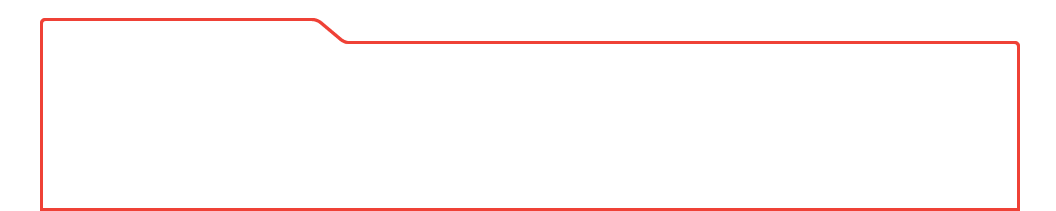
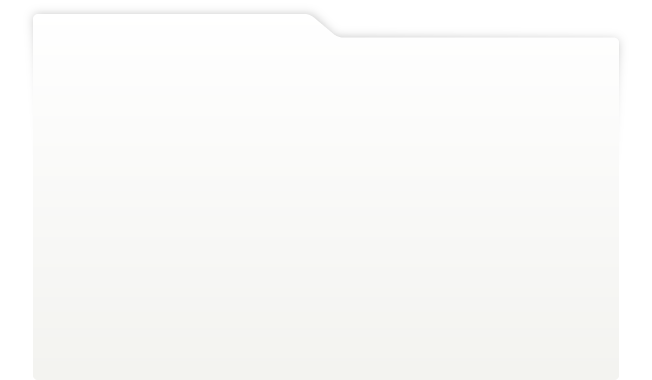
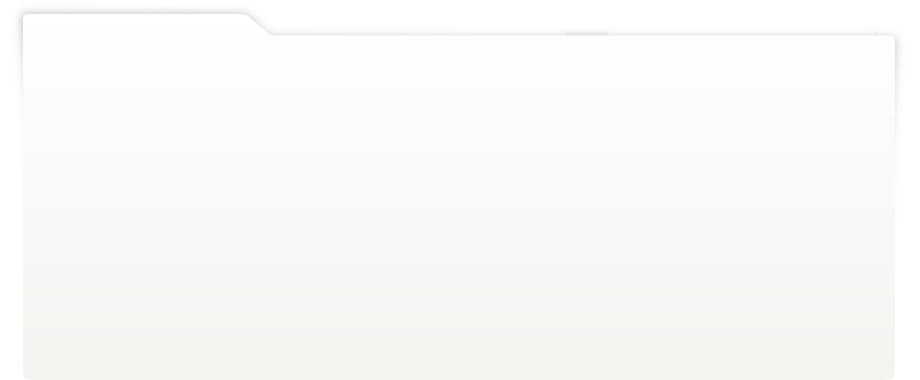
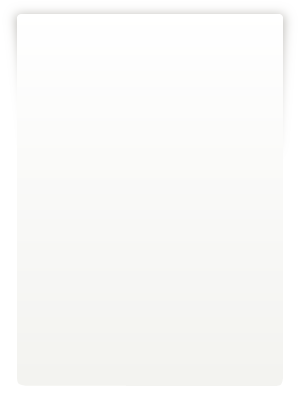
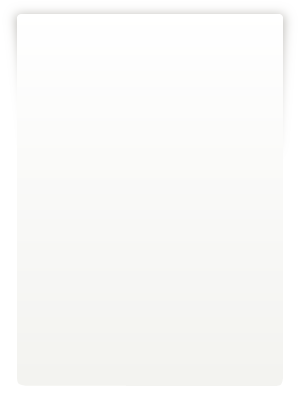
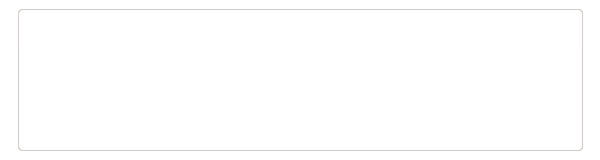
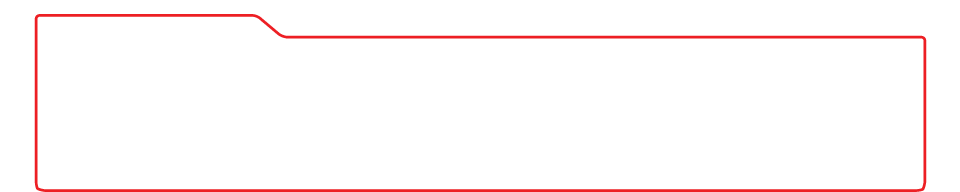
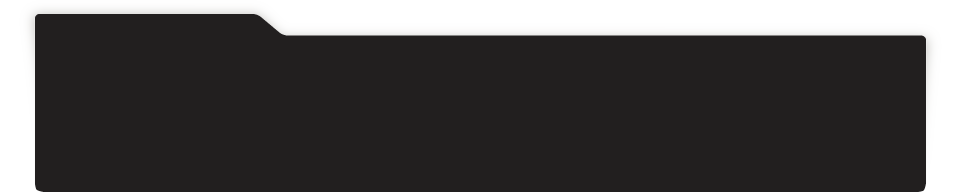
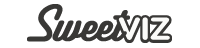
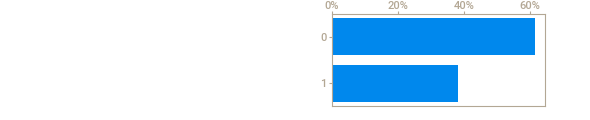
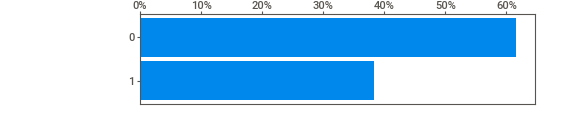
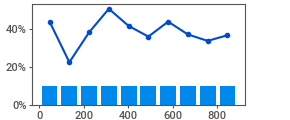
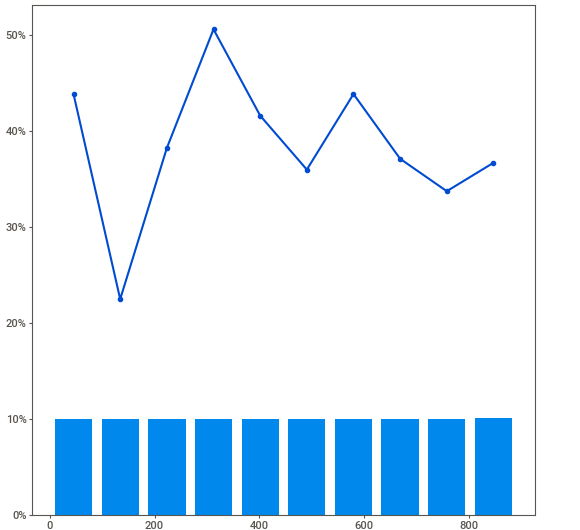
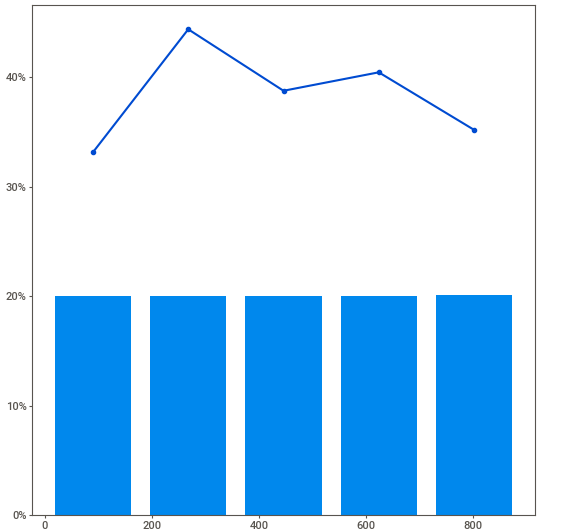
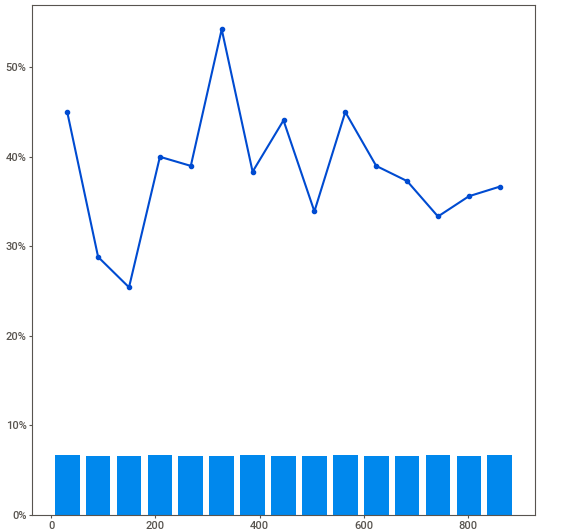
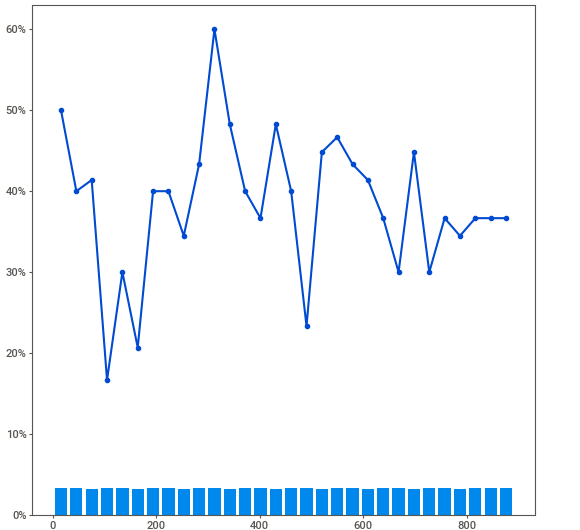
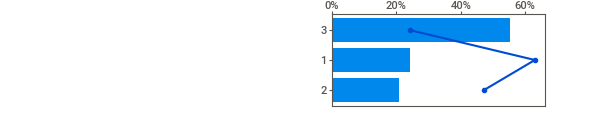
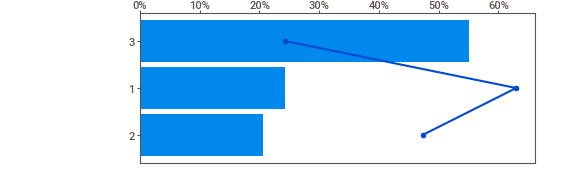
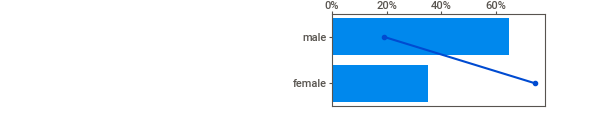
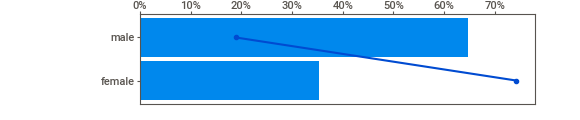
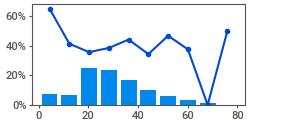
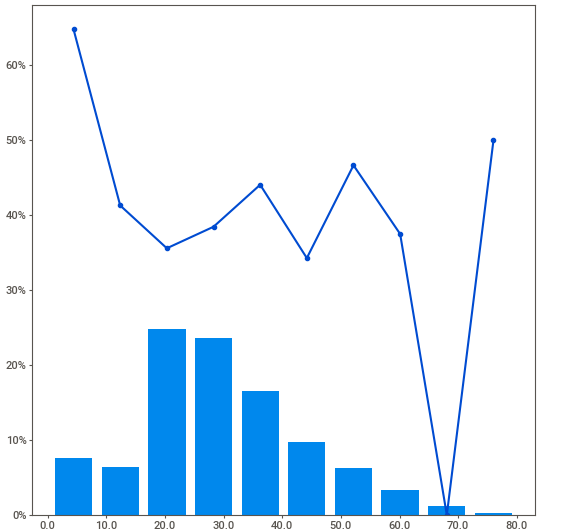
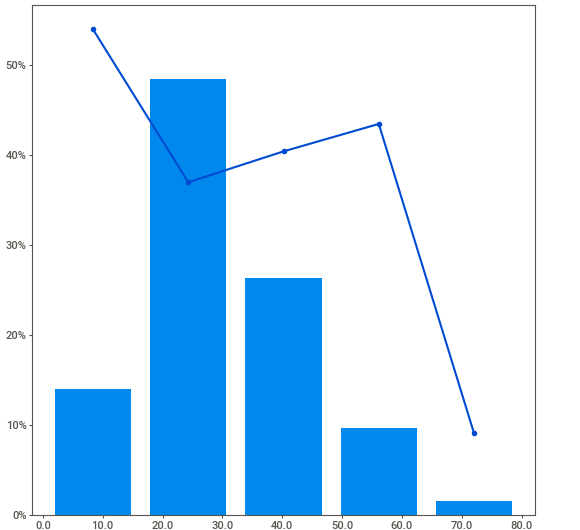
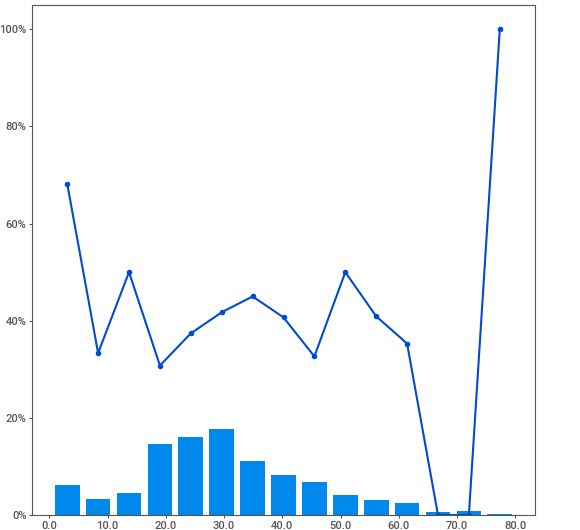
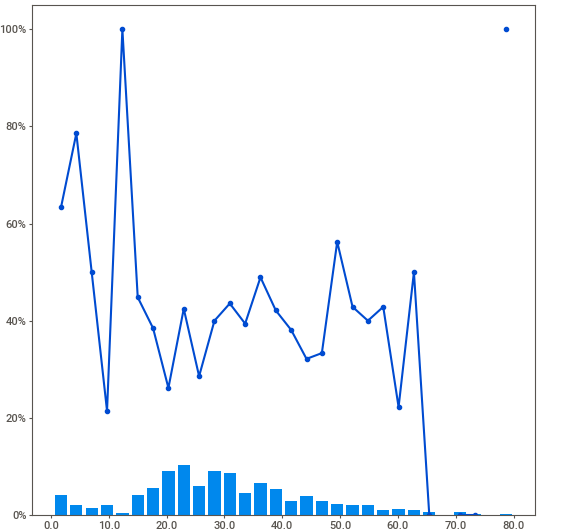
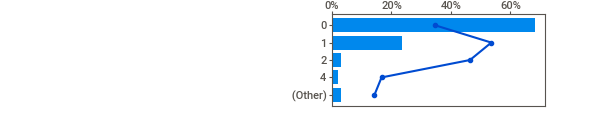
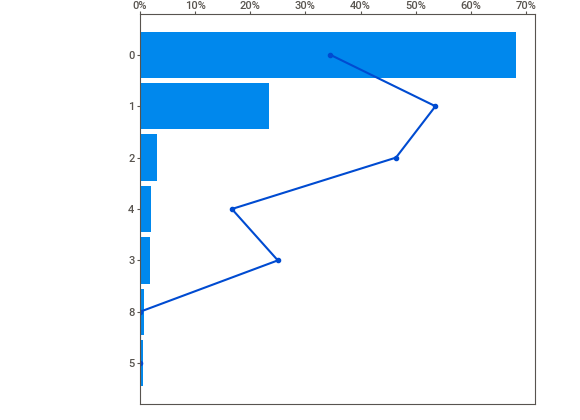
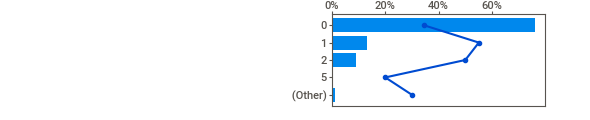
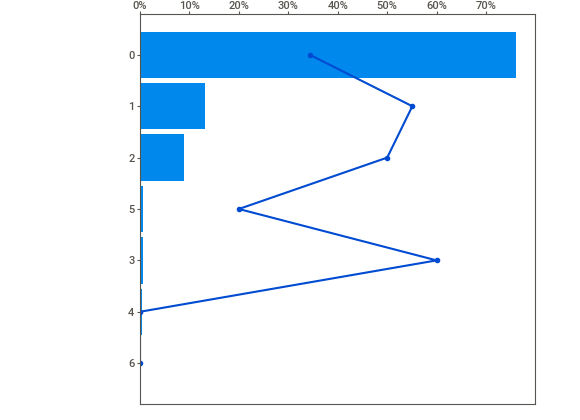
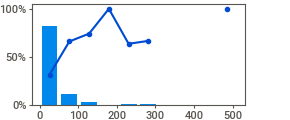
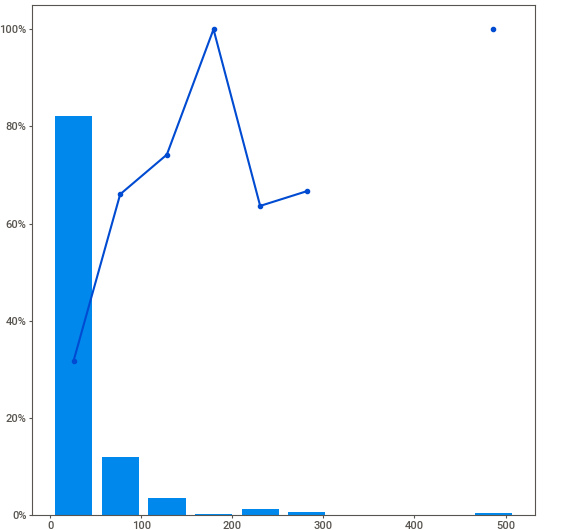
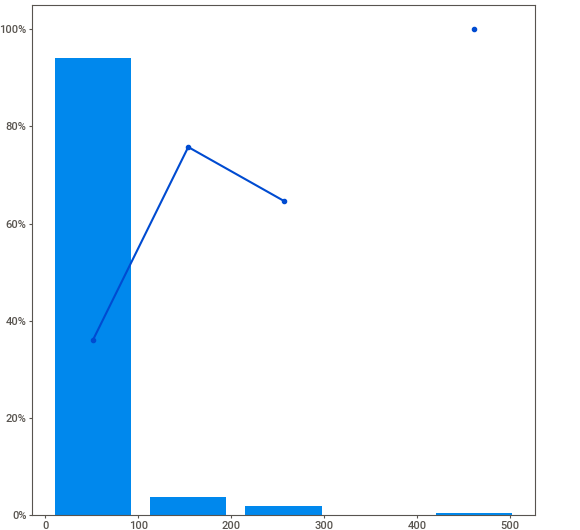
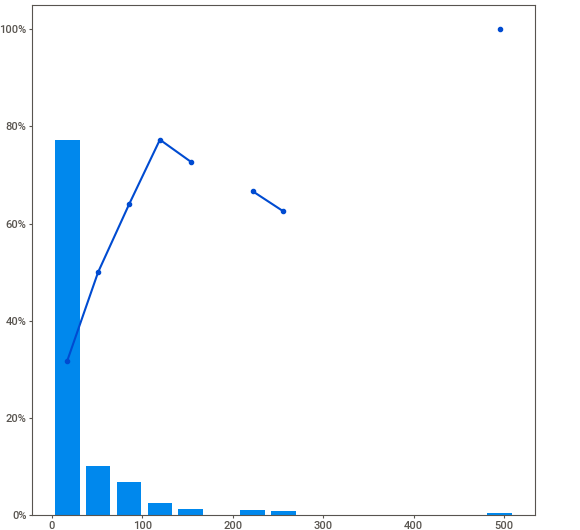
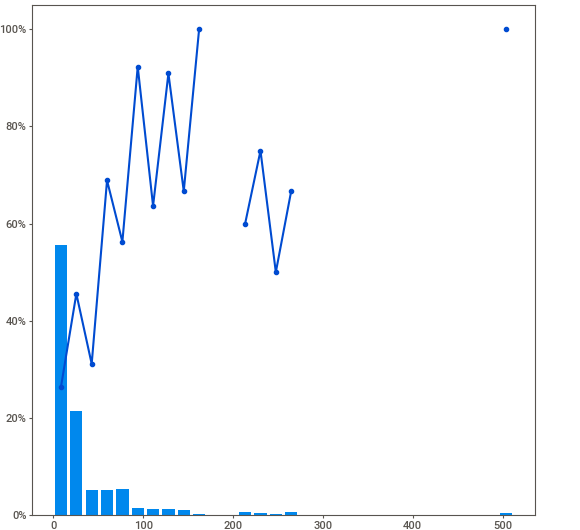
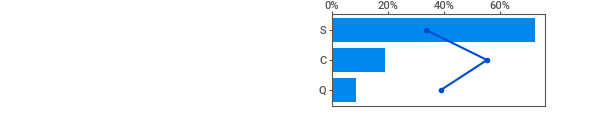
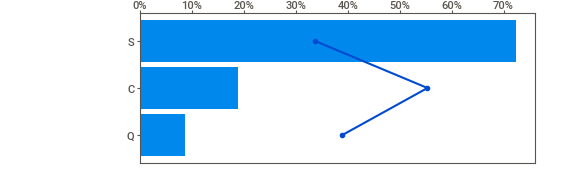
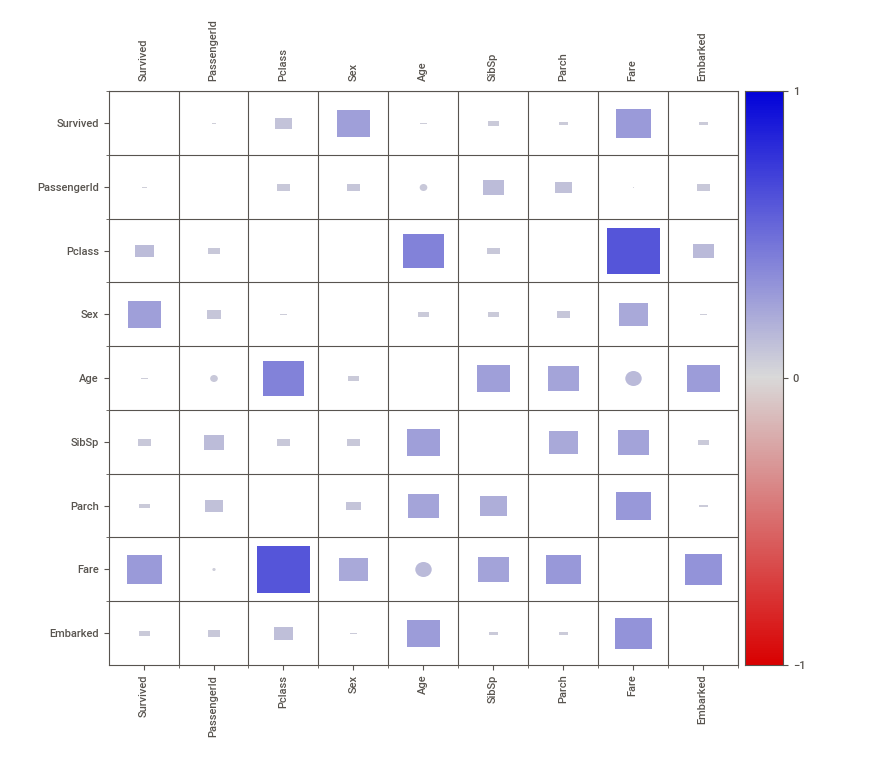
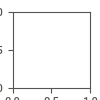

In [6]:
eda = sv.analyze(source = train, target_feat = 'Survived')
eda.show_notebook()

In [5]:
# Duplicates
train= train.drop_duplicates()
# Drop not important columns
train.drop(columns = ["PassengerId", "Name", 'Cabin', 'Ticket'], inplace= True)

In [6]:
# Missing data
train.isnull().sum()
# % of missing age data
age= 177/891*100  #As we have only 19% and age seems to be an important information we'll keep it
print(age)

19.865319865319865


**How to replace missing data for Age?**

Analyse age and the other features to decide

In [9]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

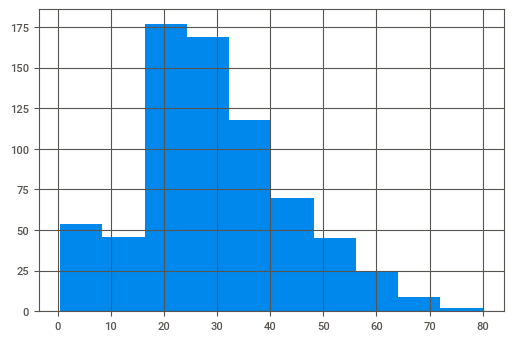

In [10]:
#Age's distribution
train['Age'].hist()

Most people's age is around 20yo and 38yo and the average is 29yo

In [11]:
# Age by Class
train['Age'].groupby(train['Pclass']).mean().round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

The most young people is in 3rd class, followed by 2nd and then 1rt class with the oldests. Considering the times the 3rd class had a lot of people working for the rich ones from 1st class

In [12]:
# Age by Gender
train['Age'].groupby(train['Sex']).mean().round()

Sex
female    28.0
male      31.0
Name: Age, dtype: float64

<AxesSubplot:>

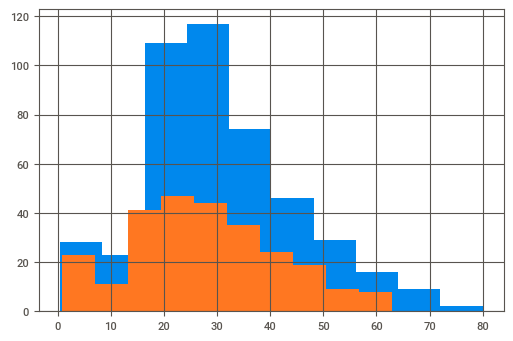

In [13]:
# Age distribution by gender
train.loc[(train.Sex == "male")]["Age"].hist()
train.loc[(train.Sex == "female")]["Age"].hist()

The average ages are close but men are mostly older than women

In [14]:
# Only age missing data separated by gender
women_age_na= train[(train['Age'].isna()) & (train["Sex"]== "female")][["Age", "Pclass", "Embarked"]]
men_age_na= train[(train['Age'].isna()) & (train["Sex"]== "male")][["Age", "Pclass", "Embarked"]]

<AxesSubplot:ylabel='Pclass'>

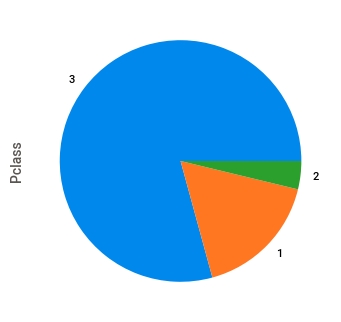

In [15]:
women_age_na['Pclass'].value_counts().plot(kind = 'pie')

<AxesSubplot:ylabel='Pclass'>

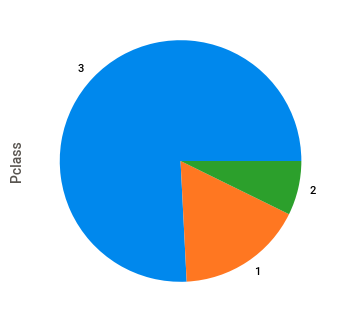

In [16]:
men_age_na['Pclass'].value_counts().plot(kind = 'pie')

Most missing data on age is from 3rd class. So it seems like age by class should be considered when replacing the missing values.

In [17]:
women_age_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 19 to 888
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       0 non-null      float64
 1   Pclass    53 non-null     int64  
 2   Embarked  53 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [18]:
men_age_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 5 to 878
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       0 non-null      float64
 1   Pclass    124 non-null    int64  
 2   Embarked  124 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB


Men has 2x more missing age data than women. So it seems like age by gender should be considered when replacing the missing values.

**Replacing data ideas**
- Notes:
    - For both men and women the missing ones are mostly from 3rd class
    - The average age for each class is different, younger on 3rd class

- Ideas:
    - The replacement will consider gender, as we see the average age for men is higher
    - Class will also be considered as we have different distributions for each class
    - Use a Linear Regression model to predict the missing age data

**To use a Linear Regression model to predict age we need to analise the data and prepare for the model**

In [7]:
# Replace the missing Embarked data with the most common value
train["Embarked"]= train["Embarked"].fillna(train["Embarked"].mode().iloc[0])

**Treatment**:
- Dummy categorical features
- Maybe create categories for SibSp and Parch
- Find outliers

In [8]:
train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [21]:
train["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [22]:
train[["Fare"]].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<AxesSubplot:>

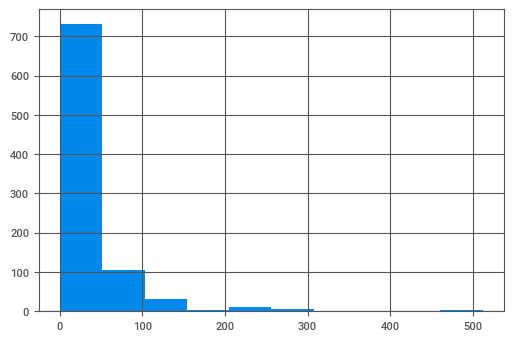

In [23]:
train["Fare"].hist()

The Fare has some unusual values that could be outliers, with the boxplot we'll replace it

<AxesSubplot:>

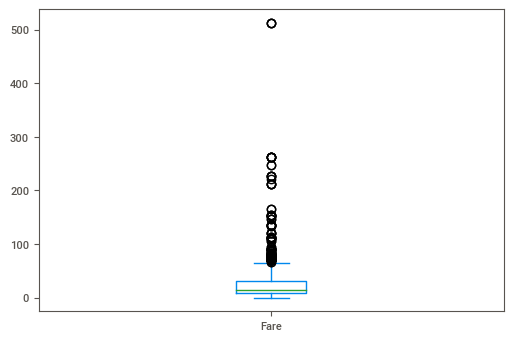

In [24]:
train["Fare"].plot(kind= "box")

In [9]:
# Replacing the values higher than the top by the top number
top = train['Fare'].quantile(0.975)
train.loc[train['Fare'] > top, 'Fare'] = top

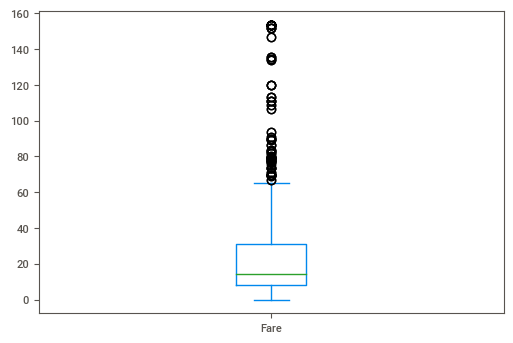

In [26]:
# New boxplot 
train['Fare'].plot(kind = 'box');

In [10]:
# Dummy classes
train_dummies = pd.get_dummies(train, columns=['Pclass', 'Embarked', 'Sex'], drop_first= True)
train_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,1,0,1,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,1,0,1,1


In [11]:
# Normalize the continuos data
train_dummies['Age'] = train_dummies['Age']/100
train_dummies['Fare'] = train_dummies['Fare']/max(train_dummies['Fare'])

In [29]:
train_dummies

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,0.22,1,0,0.047243,0,1,0,1,1
1,1,0.38,1,0,0.464500,0,0,0,0,0
2,1,0.26,0,0,0.051641,0,1,0,1,0
3,1,0.35,1,0,0.346013,0,0,0,1,0
4,0,0.35,0,0,0.052456,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,0.27,0,0,0.084711,1,0,0,1,1
887,1,0.19,0,0,0.195487,0,0,0,1,0
888,0,NaN,1,2,0.152806,0,1,0,1,0
889,1,0.26,0,0,0.195487,0,0,0,0,1


In [12]:
# Dataframe with only age missing age data for test (predict)
age_na= train_dummies[(train_dummies['Age'].isna())]

In [13]:
# Datafram with only not missing age data for training
age_notna= train_dummies[(train_dummies["Age"].notnull())]

In [14]:
# Separated data in train and test
Xtrain= age_notna.drop(columns = ["Age"])
ytrain= age_notna["Age"]

Xtest= age_na.drop(columns= ["Age"])

In [15]:
age_model= LinearRegression() #Model
age_model.fit(Xtrain, ytrain) # Fit in train data
age_predicted= age_model.predict(Xtest) #Predict the missing age data

**Replacement**: With the predicted age we can fill the missing data on the original dataframe

In [16]:
# Add the predicted info in the dataframe
Xtest["Age"]= age_predicted

In [17]:
# Putting all data together
data = pd.merge(age_notna, Xtest, how = 'outer')

In [18]:
data.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.294527,0.523008,0.381594,0.191277,0.206510,0.551066,0.086420,0.725028,0.647587
std,0.486592,0.137496,1.102743,0.806057,0.224732,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.000000,-0.060312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.210000,0.000000,0.000000,0.051546,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.290000,0.000000,0.000000,0.094187,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,0.360210,1.000000,0.000000,0.202004,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.800000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
data["Age"][(data["Age"]<0)]

785   -0.060312
786   -0.060312
787   -0.060312
788   -0.060312
792   -0.054070
793   -0.054070
794   -0.054070
Name: Age, dtype: float64

In [23]:
# .describe() shows that there are negative ages
data["Age"][(data["Age"] < 0)] = data["Age"]*-1

C:\Users\User\AppData\Local\Temp\ipykernel_5652\489183721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"][(data["Age"] < 0)] = data["Age"]*-1


In [24]:
data.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.295432,0.523008,0.381594,0.191277,0.206510,0.551066,0.086420,0.725028,0.647587
std,0.486592,0.135537,1.102743,0.806057,0.224732,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.000000,0.004200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.210000,0.000000,0.000000,0.051546,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.290000,0.000000,0.000000,0.094187,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,0.360210,1.000000,0.000000,0.202004,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.800000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Do all treatment i did in train data for the test data**

In [25]:
test= pd.read_csv('https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv')

In [26]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
test.drop_duplicates()
# Drop not important columns
test.drop(columns = ["PassengerId", "Name", 'Cabin', 'Ticket'], inplace= True)

In [28]:
# Missing data
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

<AxesSubplot:>

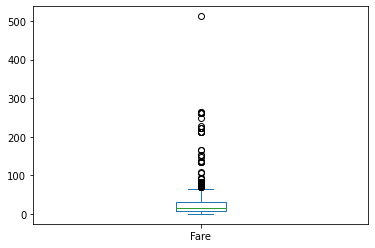

In [29]:
# Find outliers
test[["Fare"]].plot(kind="box")

In [30]:
# Replace outliers
top_test = test['Fare'].quantile(0.975)
test.loc[test['Fare'] > top_test, 'Fare'] = top_test

<AxesSubplot:>

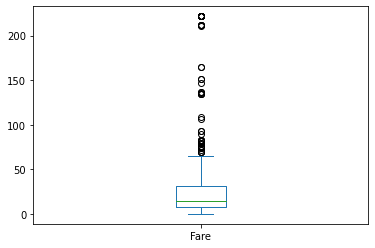

In [31]:
test[["Fare"]].plot(kind="box")

In [32]:
# Replace missing Fare data
test["Fare"]= test["Fare"].fillna(test["Fare"].mean())

In [33]:
# Class and embarked dummy
test_dummies = pd.get_dummies(test, columns=['Pclass', 'Embarked', 'Sex'], drop_first= True)
test_dummies.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,0,0,7.8292,0,1,1,0,1
1,47.0,1,0,7.0000,0,1,0,1,0
2,62.0,0,0,9.6875,1,0,1,0,1
3,27.0,0,0,8.6625,0,1,0,1,1
4,22.0,1,1,12.2875,0,1,0,1,0


In [34]:
# Normalize the continuos data
test_dummies['Age'] = test_dummies['Age']/100
test_dummies['Fare'] = test_dummies['Fare']/max(test_dummies['Fare'])

In [35]:
# Dataframe with only age missing age data for test (predict)
test_na= test_dummies[(test_dummies['Age'].isna())]

In [36]:
# Datafram with only not missing age data for training
test_notna= test_dummies[(test_dummies["Age"].notnull())]

In [37]:
Xtrain1= test_notna.drop(columns = ["Age"])
ytrain1= test_notna["Age"]

Xtest1= test_na.drop(columns= ["Age"])

In [38]:
age_test= LinearRegression() #Model
age_test.fit(Xtrain1, ytrain1) # Fit in train data
age_test_p= age_test.predict(Xtest1) #Predict the missing age data

In [39]:
# Add the predicted info in the dataframe
Xtest1["Age"]= age_test_p

In [40]:
# Putting all data together
X_test = pd.merge(test_notna, Xtest1, how = 'outer')

In [41]:
X_test.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.295957,0.447368,0.392344,0.154074,0.222488,0.521531,0.110048,0.645933,0.636364
std,0.129862,0.896760,0.981429,0.218194,0.416416,0.500135,0.313324,0.478803,0.481622
min,0.001700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220000,0.000000,0.000000,0.035602,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.270000,0.000000,0.000000,0.065174,0.000000,1.000000,0.000000,1.000000,1.000000
75%,0.363750,1.000000,0.000000,0.142033,0.000000,1.000000,0.000000,1.000000,1.000000
max,0.760000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Predict Survival**

In [42]:
X_train= data.drop(columns = ["Survived"])
y_train= data["Survived"]

val = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

**Classification Models**: 

Predict who will survive

Models:
- KNN
- Logistic regression
- Decision Tree
- Random Forest

In [43]:
metrics = ['accuracy', #Taxa de acerto
            'recall', #Taxa de verdadeiros positivos
           'precision', #Valor preditivo positivo
           'balanced_accuracy', #
           'f1'] #  

models = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

models_names = ['Logistic Regression',
                        'Tree (prof = 3)',
                        'Tree (prof = 5)',
                        'Tree (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Random Forest (tree = 50, prof = 5)',
                        'Random Forest (tree = 50, prof = 7)',
                        'Random Forest (tree = 100, prof = 5)', 
                        'Random Forest (tree = 100, prof = 7)']

resultados0 = {}

for i in range(len(models)):

    print('Modelo: ' + models_names[i])

    accs_vc = cross_validate(models[i], X_train, y_train, cv = val, scoring = metrics)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[models_names[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = metrics).T

Modelo: Logistic Regression
Modelo: Tree (prof = 3)
Modelo: Tree (prof = 5)
Modelo: Tree (prof = 7)
Modelo: 5-NN
Modelo: 15-NN
Modelo: 25-NN
Modelo: Random Forest (tree = 50, prof = 5)
Modelo: Random Forest (tree = 50, prof = 7)
Modelo: Random Forest (tree = 100, prof = 5)
Modelo: Random Forest (tree = 100, prof = 7)


In [44]:
resultados.sort_values(by = 'f1', ascending = False)

,accuracy,recall,precision,balanced_accuracy,f1
"Random Forest (tree = 50, prof = 7)",0.837809,0.706176,0.849407,0.813012,0.768887
"Random Forest (tree = 100, prof = 7)",0.835556,0.694328,0.858646,0.808932,0.763667
Tree (prof = 5),0.829451,0.688697,0.844266,0.802926,0.755281
"Random Forest (tree = 100, prof = 5)",0.834476,0.663866,0.876495,0.802320,0.752785
5-NN,0.817066,0.723655,0.786366,0.799446,0.751742
"Random Forest (tree = 50, prof = 5)",0.831629,0.665294,0.869256,0.800341,0.748060
15-NN,0.818745,0.696008,0.809466,0.795622,0.745560
Tree (prof = 7),0.813658,0.710084,0.790519,0.794032,0.743755
Tree (prof = 3),0.815924,0.700126,0.798666,0.794045,0.743620
Logistic Regression,0.801898,0.691597,0.776934,0.781093,0.728374
